In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv('IMDB Dataset.csv', engine='python', on_bad_lines='skip')
display(df.head())

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [41]:
df.shape

(7088, 2)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19291 entries, 0 to 19290
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   review            19291 non-null  object
 1   sentiment         19291 non-null  int64 
 2   transformed_text  19291 non-null  object
dtypes: int64(1), object(2)
memory usage: 452.3+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])
display(df.head())

,review,sentiment,transformed_text
0,One of the other reviewers has mentioned that ...,1,one review mention watch 1 oz episod hook righ...
1,A wonderful little production. <br /><br />The...,1,wonder littl product film techniqu fashion giv...
2,I thought this was a wonderful way to spend ti...,1,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,0,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei love time money visual stun film...


In [ ]:
df.isna().sum()

,0
review,0
sentiment,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
import nltk

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
import string

In [ ]:
import re
def transform_text (text):
  text = text.lower()
  text = re.sub(r'<br />', '', text) # Remove <br /> tags
  text = nltk.word_tokenize(text)
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)
  text = y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
       y.append(i)

  text = y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)

In [ ]:
df["transformed_text"] = df["review"].apply(transform_text)

In [ ]:
df.to_csv('imdb_dataset_cleaned.csv', index=False)
print('DataFrame exported to imdb_dataset_cleaned.csv')

DataFrame exported to imdb_dataset_cleaned.csv


In [ ]:
df.head(1)

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
good_review=wc.generate(df[df['sentiment']==1]['transformed_text'].str.cat(sep=" "))

In [ ]:
plt.imshow(good_review)

In [ ]:
bad_review=wc.generate(df[df['sentiment']==0]['transformed_text'].str.cat(sep=" "))

In [ ]:
plt.imshow(bad_review)

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(max_features= 5000)
X = tfidf.fit_transform(df['transformed_text']).toarray()
display(X.shape)

(7792, 5000)

In [ ]:
pip install sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
X = model.encode(
    df['transformed_text'].tolist(),
    show_progress_bar=True
)

print(X.shape)

Batches:   0%|          | 0/244 [00:00<?, ?it/s]

(7792, 384)


In [ ]:
pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 22.5 MB/s eta 0:00:00


In [ ]:
from gensim.models import Word2Vec
import numpy as np

In [ ]:
sentences = df['transformed_text'].apply(lambda x: x.split())

In [ ]:
w2v = Word2Vec(
    sentences=sentences,
    vector_size=100,
    window=5,
    min_count=2,
    workers=4
)


In [ ]:
def document_vector(doc):
    words = doc.split()
    vectors = [
        w2v.wv[word]
        for word in words
        if word in w2v.wv
    ]
    return np.mean(vectors, axis=0) if vectors else np.zeros(w2v.vector_size)


In [ ]:
X = np.vstack(df['transformed_text'].apply(document_vector))
print(X.shape)

(7792, 100)


In [9]:
y = df['sentiment'].values

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

Accuracy: 0.8583
Precision: 0.8457
Recall: 0.8800
F1 Score: 0.8625


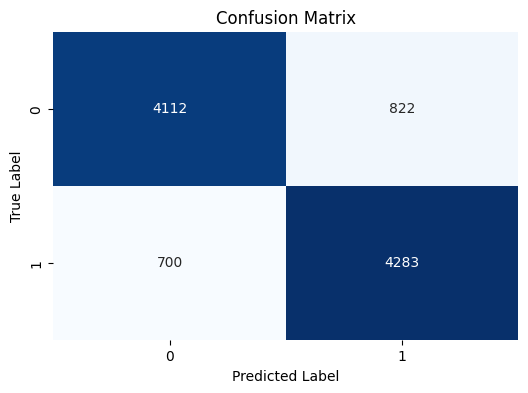

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.9/413.9 kB 12.5 MB/s eta 0:00:00


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score, precision_score

def objective(trial):
    # 2. Define ngram_range parameter
    ngram_range = trial.suggest_categorical('ngram_range', [(1, 1), (1, 2)])

    # 3. Define max_df parameter
    max_df = trial.suggest_float('max_df', 0.5, 0.8, step=0.05)

    # 4. Define min_df parameter
    min_df = trial.suggest_int('min_df', 1, 5)

    # 5. Define max_features parameter
    max_features = trial.suggest_int('max_features', 4000, 6000, step=200)

    # 6. Initialize TfidfVectorizer with trial parameters
    tfidf = TfidfVectorizer(ngram_range=ngram_range, max_df=max_df, min_df=min_df, max_features=max_features)

    # 7. Apply TfidfVectorizer
    X = tfidf.fit_transform(df['transformed_text']).toarray()

    # Prepare target variable
    y = df['sentiment'].values

    # 8. Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

    # 10. Train the model
    lr = LogisticRegression(solver='liblinear') # Using 'liblinear' solver for binary classification
    lr.fit(X_train, y_train)

    # 11. Make predictions
    y_pred = lr.predict(X_test)

    # Calculate F1-score and Precision
    current_f1_score = f1_score(y_test, y_pred)

    return current_f1_score

print("Objective function 'objective' redefined to prioritize precision=1 successfully.")

Objective function 'objective' redefined to prioritize precision=1 successfully.


In [ ]:
import optuna

# Create an Optuna study object
# We want to maximize the F1-score among precision=1 solutions, so direction is 'maximize'
study = optuna.create_study(direction='maximize')

# Run the optimization process with the new objective function
# Call the objective function for a specified number of trials (e.g., 100)
study.optimize(objective, n_trials=100)

# Print the best trial's value (maximum F1-score achieved with precision=1)
print(f"Best trial's F1-score : {study.best_value:.4f}")

# Print the best trial's parameters
print("Best trial's parameters (for precision=1):")
for key, value in study.best_params.items():
    print(f"  {key}: {value}")

[I 2026-01-31 06:17:32,195] A new study created in memory with name: no-name-d5f390c0-d574-439d-8f86-609e04ea7e2a
/tmp/ipython-input-2604589048.py:8: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (1, 1) which is of type tuple.
  ngram_range = trial.suggest_categorical('ngram_range', [(1, 1), (1, 2)])
/tmp/ipython-input-2604589048.py:8: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (1, 2) which is of type tuple.
  ngram_range = trial.suggest_categorical('ngram_range', [(1, 1), (1, 2)])
[I 2026-01-31 06:17:37,348] Trial 0 finished with value: 0.8861102741789696 and parameters: {'ngram_range': (1, 1), 'max_df': 0.75, 'min_df': 5, 'max_features': 4200}. Best is trial 0 with value: 0.8861102741789696.
/tmp/ipython-input-2604589048.py:8: UserWarning: Choices for a categorical distribution should be a tuple 

Best trial's F1-score : 0.8902
Best trial's parameters (for precision=1):
  ngram_range: (1, 1)
  max_df: 0.55
  min_df: 2
  max_features: 5200


In [ ]:
best_params_precision1 = study.best_params

optimal_ngram_range_precision1 = best_params_precision1['ngram_range']
optimal_max_df_precision1 = best_params_precision1['max_df']
optimal_min_df_precision1 = best_params_precision1['min_df']
optimal_max_features_precision1 = best_params_precision1['max_features']

print("Stored optimal TF-IDF parameters for precision=1:")
print(f"  ngram_range: {optimal_ngram_range_precision1}")
print(f"  max_df: {optimal_max_df_precision1}")
print(f"  min_df: {optimal_min_df_precision1}")
print(f"  max_features: {optimal_max_features_precision1}")

In [7]:
tfidf = TfidfVectorizer(  ngram_range =(1, 1), max_df= 0.55, min_df= 2, max_features= 5200)
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [8]:
import pickle

# Define the filename for the exported TF-IDF vectorizer
tfidf_filename = 'tfidf_vectorizer.pkl'

# Open the file in binary write mode and save the tfidf object
with open(tfidf_filename, 'wb') as file:
    pickle.dump(tfidf, file)

print(f"TF-IDF vectorizer exported to {tfidf_filename}")

TF-IDF vectorizer exported to tfidf_vectorizer.pkl


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
lr = LogisticRegression(
        solver="liblinear",
        penalty="l2",
        C=2.909456422800902,
        max_iter=195,
        class_weight="balanced",
        n_jobs=-1,
        random_state=42
    )
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Logistic Regression Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Logistic Regression Recall: {recall_score(y_test, y_pred_lr):.4f}")
print(f"Logistic Regression F1 Score: {f1_score(y_test, y_pred_lr):.4f}")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(


Logistic Regression Accuracy: 0.8791
Logistic Regression Precision: 0.8697
Logistic Regression Recall: 0.8897
Logistic Regression F1 Score: 0.8796


Logistic Regression Accuracy: 0.8888
Logistic Regression Precision: 0.8808
Logistic Regression Recall: 0.9005
Logistic Regression F1 Score: 0.8905

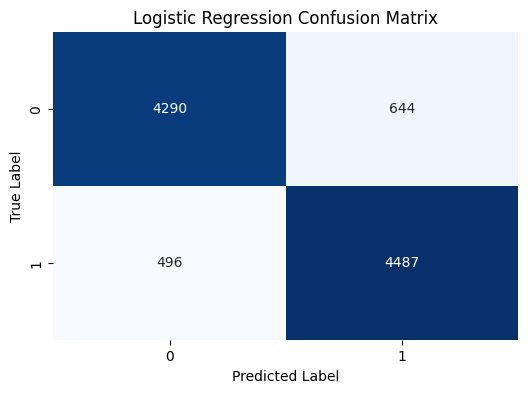

In [ ]:
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [42]:
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

def objective_lr(trial):

    # Regularization strength
    C = trial.suggest_float("C", 1e-3, 10.0, log=True)

    # Tolerance
    tol = trial.suggest_float("tol", 1e-6, 1e-3, log=True)

    # Class weight
    class_weight = trial.suggest_categorical("class_weight", [None, "balanced"])

    # Max iterations
    max_iter = trial.suggest_int("max_iter", 200, 1000)

    # Build model
    model = LogisticRegression(
        solver = "liblinear",
        penalty = "l2", # Added missing comma here
        C=C,
        tol=tol,
        class_weight=class_weight,
        max_iter=max_iter,
        random_state=42,
        n_jobs=-1
    )

    # Train
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Metric
    return f1_score(y_test, y_pred)


print("Objective function 'objective_lr' redefined successfully with comprehensive hyperparameter tuning for Logistic Regression.")

ModuleNotFoundError: No module named 'optuna'

In [ ]:
import optuna

# Create an Optuna study object to maximize the F1-score
study_lr = optuna.create_study(direction='maximize')

# Run the optimization process with the objective_lr function for 100 trials
study_lr.optimize(objective_lr, n_trials=50)

# Print the best trial's value (maximum F1-score)
print(f"Best trial's F1-score for Logistic Regression: {study_lr.best_value:.4f}")

# Print the best trial's parameters
print("Best trial's parameters for Logistic Regression:")
for key, value in study_lr.best_params.items():
    print(f"  {key}: {value}")

[I 2026-01-31 06:10:33,332] A new study created in memory with name: no-name-39b95b7f-887c-469d-b1e8-5fccd9c9e5a3
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
[W 2026-01-31 06:13:24,309] Trial 0 failed with parameters: {'C': 1.473718103480442, 'tol': 1.0680108191543028e-05, 'fit_intercept': True, 'class_weight': None, 'max_iter': 248, 'warm_start': False, 'solver': 'newton-cg', 'penalty_other_solvers': 'none', 'intercept_scaling': 6.831007259097964} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/optuna/study/_optimize.py", line 206, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "/tmp/ipython-input-3671552705.py", line 63, in objective_lr
    model.fit(X_train, y_train)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.p

KeyboardInterrupt: 

In [ ]:
from xgboost import XGBClassifier

# Instantiate an XGBClassifier object
xgb = XGBClassifier(random_state=2, use_label_encoder=False, eval_metric='logloss')

# Train the XGBoost model
xgb.fit(X_train, y_train)

# Make predictions on X_test
y_pred_xgb = xgb.predict(X_test)

# Calculate and print the evaluation metrics
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"XGBoost Precision: {precision_score(y_test, y_pred_xgb):.4f}")
print(f"XGBoost Recall: {recall_score(y_test, y_pred_xgb):.4f}")
print(f"XGBoost F1 Score: {f1_score(y_test, y_pred_xgb):.4f}")

NameError: name 'X_train' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Re-split the data after updating X with optimal TF-IDF parameters
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Instantiate an XGBClassifier object
xgb = XGBClassifier(random_state=2, use_label_encoder=False, eval_metric='logloss')

# Train the XGBoost model
xgb.fit(X_train, y_train)

# Make predictions on X_test
y_pred_xgb = xgb.predict(X_test)

# Calculate and print the evaluation metrics
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"XGBoost Precision: {precision_score(y_test, y_pred_xgb):.4f}")
print(f"XGBoost Recall: {recall_score(y_test, y_pred_xgb):.4f}")
print(f"XGBoost F1 Score: {f1_score(y_test, y_pred_xgb):.4f}")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:34:31] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.8564
XGBoost Precision: 0.8435
XGBoost Recall: 0.8788
XGBoost F1 Score: 0.8608


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate a RandomForestClassifier object
rf = RandomForestClassifier(random_state=2)

# Train the Random Forest model
rf.fit(X_train, y_train)

# Make predictions on X_test
y_pred_rf = rf.predict(X_test)

# Calculate and print the evaluation metrics
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Random Forest Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Random Forest Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"Random Forest F1 Score: {f1_score(y_test, y_pred_rf):.4f}")

Random Forest Accuracy: 0.8497
Random Forest Precision: 0.8520
Random Forest Recall: 0.8502
Random Forest F1 Score: 0.8511


In [ ]:
from sklearn.svm import SVC

# Instantiate an SVC object
# Using a linear kernel for text data can be effective and computationally less expensive than RBF for high-dimensional sparse data
svm = SVC(kernel='linear', random_state=2)

# Train the SVM model
svm.fit(X_train, y_train)

# Make predictions on X_test
y_pred_svm = svm.predict(X_test)

# Calculate and print the evaluation metrics
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"SVM Precision: {precision_score(y_test, y_pred_svm):.4f}")
print(f"SVM Recall: {recall_score(y_test, y_pred_svm):.4f}")
print(f"SVM F1 Score: {f1_score(y_test, y_pred_svm):.4f}")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Instantiate a KNeighborsClassifier object
# Using n_neighbors=5 as a common starting point
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn.fit(X_train, y_train)

# Make predictions on X_test
y_pred_knn = knn.predict(X_test)

# Calculate and print the evaluation metrics
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"KNN Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"KNN Recall: {recall_score(y_test, y_pred_knn):.4f}")
print(f"KNN F1 Score: {f1_score(y_test, y_pred_knn):.4f}")

KNN Accuracy: 0.7497
KNN Precision: 0.7241
KNN Recall: 0.8152
KNN F1 Score: 0.7670
